<a href="https://colab.research.google.com/github/hitomitsu50/Sports_data_portfolio_MLB_Statcast/blob/main/2025%E5%B9%B4Statcast%E3%83%87%E3%83%BC%E3%82%BFWhiff%EF%BC%85TOP10%E5%86%99%E7%B5%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ライブラリのインストール
!pip install pybaseball japanize_matplotlib
!sudo apt-get -y update
!sudo apt=get -y install fonts-ipaexfont

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 3,917 B in 1s (3,375 B/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
sudo: invalid option -- 'y'
usage: sudo -h | -K | -k | -V
usage: sudo -v [-ABknS] [-g group] [-h host] [-p prompt] [-u user]
usage: sudo -l [-ABknS

In [ ]:
#ライブラリのインポート
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
import time
import glob
from pybaseball import statcast

In [ ]:
#データの読み込みと結合
#ファイル名パターンに一致するＣＳＶを取得
csv_files_pattern="sample_data/statcast_*.csv"
csv_files=glob.glob(csv_files_pattern)

In [ ]:
#各CSVファイルを読み込み リストに格納
dfs=[]
for file in csv_files:
  try:
    df_month=pd.read_csv(file)
    dfs.append(df_month)
    print(f"{file}を読み込みました。")
  except Exception as e:
    print(f"{file}の読み込み中にエラーが発生: {e}")

sample_data/statcast_2025-07-01-2025-07-31.csvを読み込みました。
sample_data/statcast_2025-08-01-2025-08-31.csvを読み込みました。
sample_data/statcast_2025-05-01-2025-05-31.csvを読み込みました。
sample_data/statcast_2025-06-01-2025-06-30.csvを読み込みました。
sample_data/statcast_2025-04-01-2025-04-30.csvを読み込みました。
sample_data/statcast_2025-03-18-2025-03-31.csvを読み込みました。
sample_data/statcast_2025-09-01-2025-09-28.csvを読み込みました。


In [ ]:
#全てのデータフレームを結合
if dfs:
  df_combined=pd.concat(dfs, ignore_index=True)
  df=df_combined #結合したファイルをｄｆに格納
  print("全てのデータフレームを結合しました。")
  display(df.head())
  print(f"結合後の行数:{len(df)}")
else:
  print("読み込めるＣＳＶファイルが見つかりませんでした。")

全てのデータフレームを結合しました。


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,FF,2025-07-31,94.9,-1.51,5.49,"Iglesias, Raisel",666158,628452,field_out,hit_into_play,...,1.0,1.03,0.80,-0.80,33.4,14.625621,5.139658,26.105401,39.877731,29.346793
1,CH,2025-07-31,88.6,-1.83,5.27,"Iglesias, Raisel",666158,628452,NaN,foul,...,1.0,2.09,1.07,-1.07,27.5,24.633351,-10.604571,30.797530,36.951177,47.111399
2,FF,2025-07-31,96.4,-2.57,4.90,"Iglesias, Raisel",668715,628452,strikeout,swinging_strike,...,1.0,1.21,1.09,1.09,22.3,-10.379971,49.317661,30.875973,29.386007,10.276153
3,FF,2025-07-31,95.7,-1.49,5.55,"Iglesias, Raisel",668715,628452,NaN,called_strike,...,1.0,1.14,0.67,0.67,35.6,NaN,NaN,NaN,NaN,NaN
4,FF,2025-07-31,93.0,-2.06,5.11,"Iglesias, Raisel",668715,628452,NaN,called_strike,...,1.0,1.47,0.92,0.92,23.6,NaN,NaN,NaN,NaN,NaN


結合後の行数:742080


In [ ]:
#-----------------------------------------
#Whiff%算出とTOP10の抽出
#-----------------------------------------
#1. 空振り（Whiff）とスイング（Swing）の定義
#Statcastデータから"description"列を使用してフラグを作成します。
#空振り（Whiff)の定義 ： descriptionが”swinging_strike”である投球
df["whiff"]=(df["description"]=="swinging_strike")
#スイング（Swing）の定義：空振り、ファウル、打球になった投球をスイングとする。
swing_values=["swinging_strike","foul","fit_into_play","foul_tip","swinging_strike_blocked"]
df["swing"]=df["description"].isin(swing_values)
#2.投手ごとに集計
#"player_name"ごとにグループ化し、WhiffとSwingの合計を計算
pitcher_stats=df.groupby("player_name").agg(
    Whiffs=("whiff","sum"),
    Swings=("swing","sum")
).reset_index()
#3.信頼性を担保するフィルタリング
#Whiff%の信頼性を高めるため、最低スイング数（150スイング）を設ける
MIN_SWINGS=150
pitcher_stats_filtered=pitcher_stats[pitcher_stats["Swings"]>=MIN_SWINGS].copy()
#4.Whiff&を計算
pitcher_stats_filtered["Whiff%"]=(
    (pitcher_stats_filtered["Whiffs"] / pitcher_stats_filtered["Swings"])*100
)
#TOP10の抽出
top_10_whiff_pitchers=pitcher_stats_filtered.sort_values(
    by="Whiff%",
    ascending=False
).head(10)
print(f"\n---スイング数{MIN_SWINGS}以上の投手を対象としたW比FF％TOP10---")
display(top_10_whiff_pitchers)


---スイング数150以上の投手を対象としたW比FF％TOP10---


,player_name,Whiffs,Swings,Whiff%
210,"Cruz, Fernando",132,248,53.225806
643,"Miller, Mason",200,388,51.546392
3,"Abreu, Bryan",203,401,50.623441
548,"Little, Brendon",177,352,50.284091
251,"Díaz, Edwin",189,384,49.218750
187,"Cleavinger, Garrett",144,305,47.213115
96,"Blanco, Ronel",123,265,46.415094
180,"Chivilli, Angel",146,316,46.202532
684,"Muñoz, Andrés",163,353,46.175637
591,"Maton, Phil",156,339,46.017699


/tmp/ipython-input-2493729107.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(


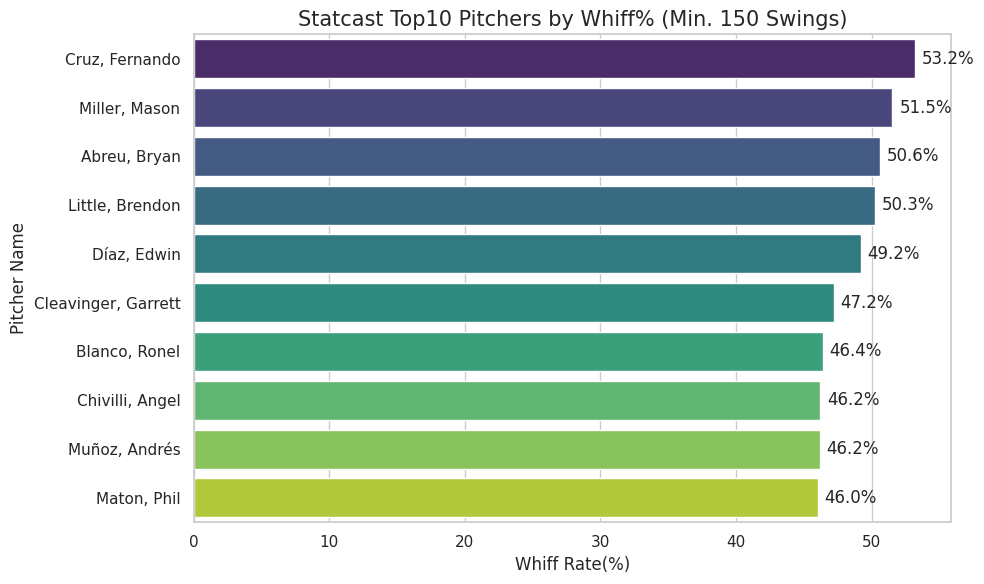

In [ ]:
#1.Top10の抽出（Whiff％が高い順にソート）
top_10_whiff=pitcher_stats_filtered.sort_values("Whiff%",ascending=False).head(10)
#2.グラフスタイル設定
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
#3.棒グラフの作成
#x軸にWhidd％、y軸に選手名を指定
plot=sns.barplot(
    data=top_10_whiff,
    x="Whiff%",
    y="player_name",
    palette="viridis" #綺麗なグラデーションカラー
)
#4.グラフの装飾（タイトルやラベル）
plt.title(f"Statcast Top10 Pitchers by Whiff% (Min. {MIN_SWINGS} Swings)",fontsize=15)
plt.xlabel("Whiff Rate(%)",fontsize=12)
plt.ylabel("Pitcher Name", fontsize=12)
#各棒の横に数値を表示する
for i, p in enumerate(plot.patches):
  width=p.get_width()
  plot.text(width + 0.5, p.get_y() + p.get_height()/2,
            f"{width:.1f}%", va="center")
#5.グラフの表示
plt.tight_layout()
plt.show()